In [9]:
bin_dir = './'

In [10]:
import sys
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import pandas as pd
import networkx as nx
import seaborn as sns
sys.path.append('..')
import conet 
import conet.src.data_converter.data_converter as dc
import conet.src.conet as c
import conet.src.conet_parameters as cp
import conet.src.inference_result as ir

In [11]:
data_converter = dc.DataConverter("data/SA501X3F_filtered_corrected_counts.csv", ',', 150000, 3095677412)

In [12]:
breakpoint_candidates_indices = pd.read_csv('data/indices.csv', header=None, sep = ' ')[1].tolist()

In [13]:
data_converter.create_CoNET_input_files(breakpoint_candidates_indices, "./data_dump/", chromosomes=[23])

In [14]:
conet = c.CoNET(bin_dir + "CoNET")
params = cp.CoNETParameters(data_size_prior_c = 0.01, data_dir = "./data_dump/")
conet.infer_tree(params)

./CoNET ./data_dump/ 100000 100000 0.0 1.0 0.01 1 12312 4 5 4 10 10 10000 1
b'Input files have been loaded succesfully'
b'Starting parameter estimation'
b'Finished parameter estimation'
b'Estimated breakpoint distribution:'
b'(weight: 1 mean: 0.650284sd: 0.414195)'
b''
b'Estimated no-breakpoint distribution:'
b'mean: 0 sd: 0.303276'
b''
b'State after 0 iterations:'
b'Tree size: 4'
b'Log-likelihood: 1533.27'
b'State after 10000 iterations:'
b'Tree size: 6'
b'Log-likelihood: 3813.21'
b'State after 20000 iterations:'
b'Tree size: 6'
b'Log-likelihood: 3815.53'
b'State after 30000 iterations:'
b'Tree size: 7'
b'Log-likelihood: 3828.98'
b'State after 40000 iterations:'
b'Tree size: 7'
b'Log-likelihood: 3825.36'
b'State after 50000 iterations:'
b'Tree size: 6'
b'Log-likelihood: 3815.53'
b'State after 60000 iterations:'
b'Tree size: 6'
b'Log-likelihood: 3815.62'
b'State after 70000 iterations:'
b'Tree size: 7'
b'Log-likelihood: 3828.98'
b'State after 80000 iterations:'
b'Tree size: 7'
b'Log-li

In [15]:
results = ir.InferenceResult("./data_dump/")

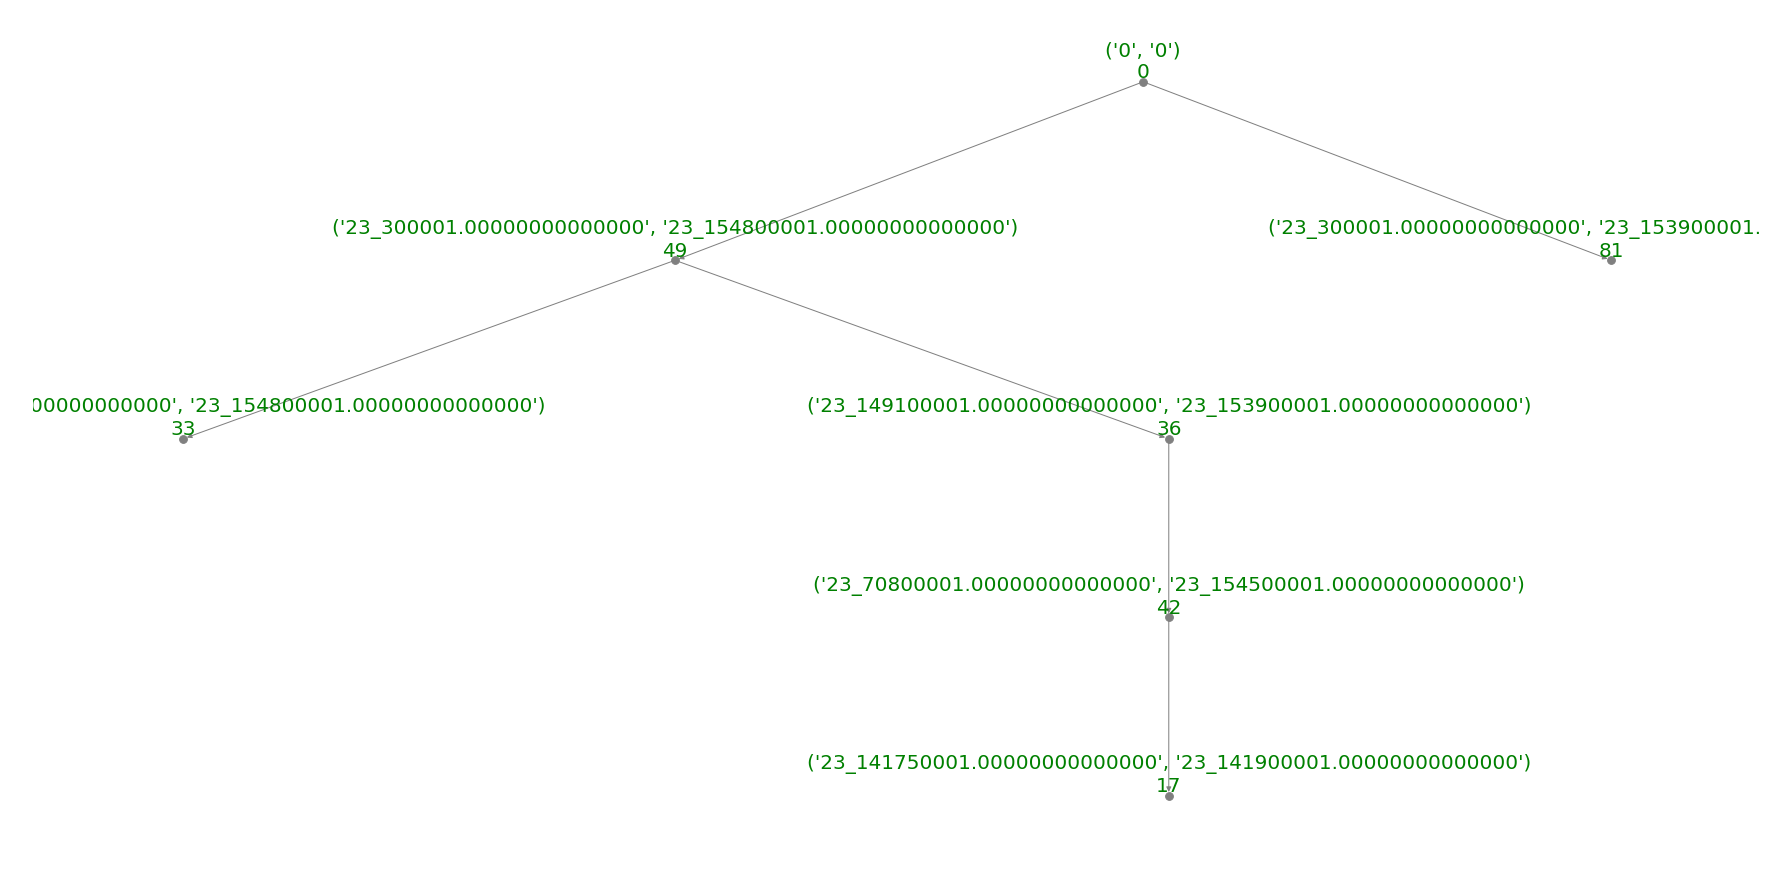

In [16]:
tree_labels = {} 
for node in results.tree.nodes:
    tree_labels[node] = str(node) + '\n' + str(sum(x == node for x in results.attachment.values()))
    
plt.figure(3, figsize=(24,12))
pos = graphviz_layout(results.tree, prog = "dot")
nx.draw(results.tree, pos = pos, labels= tree_labels, with_labels=True, node_color = "grey", node_size = 60, verticalalignment = "bottom",
       font_size=20, edge_color="grey", font_color="green")
plt.show()

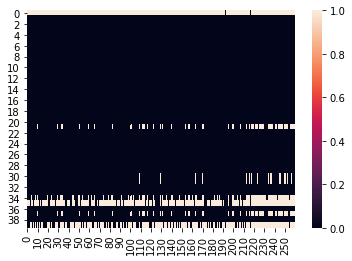

In [37]:
sns.heatmap(np.transpose(results.bp_matrix))

In [30]:
import pandas as pd
import numpy as np
counts = pd.read_csv("data/SA501X3F_filtered_corrected_counts.csv")

In [31]:
counts = counts[counts["chr"] == 23]

In [32]:
counts.head()

,chr,start,end,width,SA501X3F-00136,SA501X3F-00268,SA501X3F-00324,SA501X3F-00164,SA501X3F-00143,SA501X3F-00331,...,SA501X3F-00038,SA501X3F-00103,SA501X3F-00156,SA501X3F-00357,SA501X3F-00314,SA501X3F-00344,SA501X3F-00194,SA501X3F-00302,SA501X3F-00300,SA501X3F-00375
17142,23,300001,450000,150000,0.682271,0.706062,0.752117,0.469247,0.833417,0.927818,...,1.515883,2.070471,1.634428,1.840845,1.557543,1.208303,2.838085,1.932674,2.546396,1.703201
17143,23,450001,600000,150000,0.810774,0.592130,0.985880,0.493654,0.781665,0.847619,...,1.863623,1.827435,1.583410,1.889805,1.660408,1.685574,2.783134,1.710202,2.172236,1.907046
17144,23,600001,750000,150000,0.882037,0.956685,1.018773,0.710464,0.617444,1.172893,...,2.051701,2.523886,1.913660,1.845941,1.686030,1.969216,3.581597,1.834352,2.101527,1.713382
17145,23,750001,900000,150000,0.750055,1.151276,0.525725,0.688453,0.727916,0.832023,...,2.446983,2.246590,1.704029,1.837860,1.430069,1.764123,2.418319,1.304394,2.055968,1.335730
17146,23,1500001,1650000,150000,0.732718,1.142171,0.968155,1.102106,1.297957,1.080097,...,1.972724,2.325343,1.950133,1.650381,1.691026,2.151273,2.873903,2.056513,1.710807,1.592233


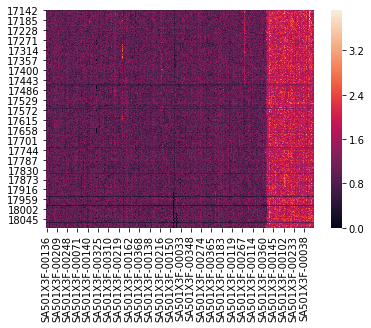

In [33]:
sns.heatmap(counts.iloc[:,range(4,264)])

In [34]:
inferred_heatmap = np.zeros((counts.shape[0], counts.shape[1] - 4))

In [40]:
m = min(counts.index)
m2 = max(counts.index)
loci =[x for x in breakpoint_candidates_indices if x >= m and x <= m2]

In [44]:
for i in range(0, 260):
    for l in loci:
        if results.bp_matrix[i, loci.index(l)] == 1:
            inferred_heatmap[l - m, i] = 1

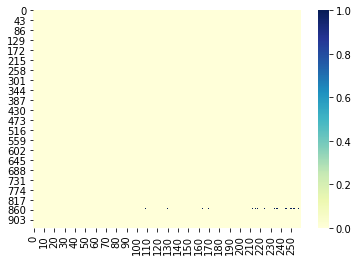

In [47]:
sns.heatmap(inferred_heatmap, cmap="YlGnBu")